# Ensemble Techniques Project

### 1. Import the necessary libraries

Necessary libaries for EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Necessary libaries for Machine Learning

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, mean_absolute_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Machine Learning Models
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier

### 2. Read the data as a data frame

In [3]:
df = pd.read_csv('bank-full.csv')
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


### 3. Perform basic EDA which should include the following and print out your insights at every step.

#### a. Shape of the dataset

In [4]:
row, column = df.shape
print('The dataset contains', row, 'rows and', column, 'columns')

The dataset contains 45211 rows and 17 columns


#### b. Data type of each attribute

In [5]:
print('The data type of each attribute: \n')
df.dtypes

The data type of each attribute: 



age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

#### c. Checking the presence of missing values

In [6]:
print('Missing values:\n', df.isnull().sum()) #no missing values

Missing values:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64


Fortunately, the dataset doesn't contain any missing values.

Desribe function to generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


#### d. 5 point summary of numerical attributes

In [8]:
summary = df.describe().T
summary.loc[:, 'min':'max'] #five point summary consisting of min, Q1(25%), Q2(50%), Q3(75%) and max values of each \
                            #numerical attributes

,min,25%,50%,75%,max
age,18.0,33.0,39.0,48.0,95.0
balance,-8019.0,72.0,448.0,1428.0,102127.0
day,1.0,8.0,16.0,21.0,31.0
duration,0.0,103.0,180.0,319.0,4918.0
campaign,1.0,1.0,2.0,3.0,63.0
pdays,-1.0,-1.0,-1.0,-1.0,871.0
previous,0.0,0.0,0.0,0.0,275.0


Distribution of Numerical Attributes

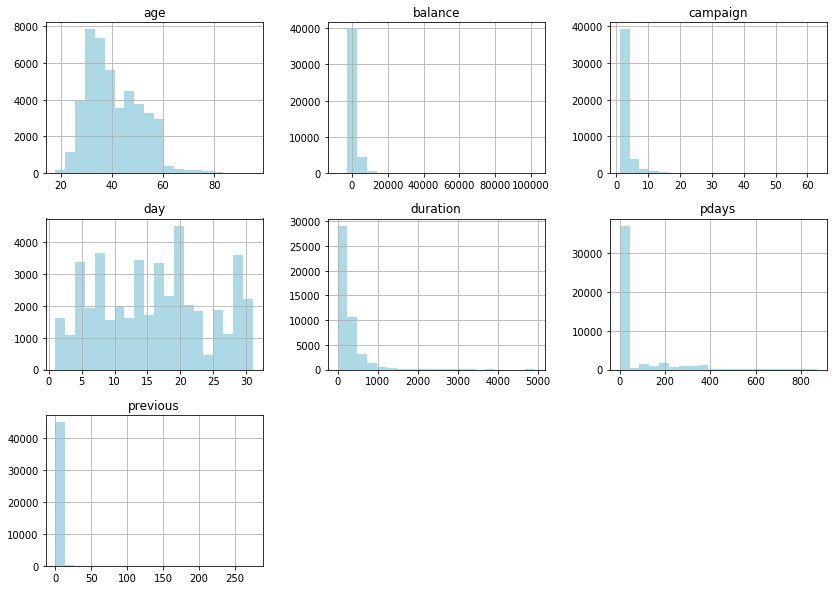

In [9]:
df.hist(bins = 20, figsize = (14, 10), color = 'lightblue')
plt.show()

Text(0.5, 1.0, 'Age Count Distribution')

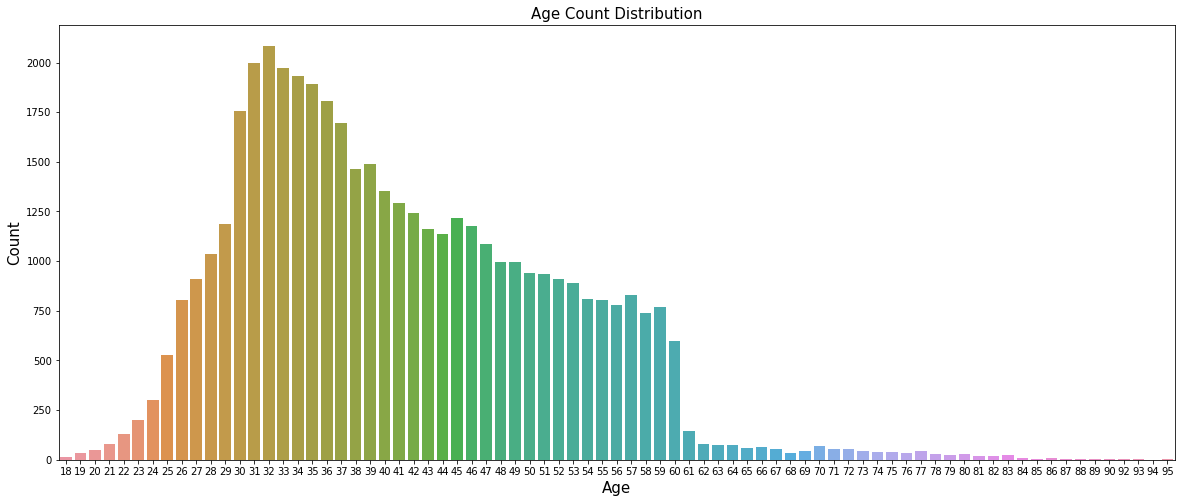

In [10]:
plt.figure(figsize = (20, 8))

sns.countplot(x = 'age', data = df)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Age Count Distribution', fontsize = 15)

no     39922
yes     5289
Name: Target, dtype: int64


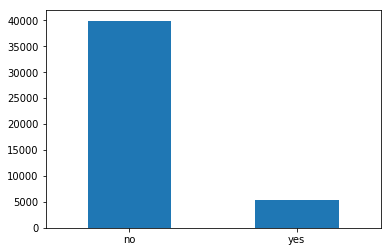

In [11]:
print(df['Target'].value_counts())
df.Target.value_counts().plot(kind = 'bar', rot = 0)

The dataset we have is highly in favour of the 'NO' group. This skewness may create a bias in the model.

Text(0.5, 1.0, 'Status of Subscription of Term Deposit')

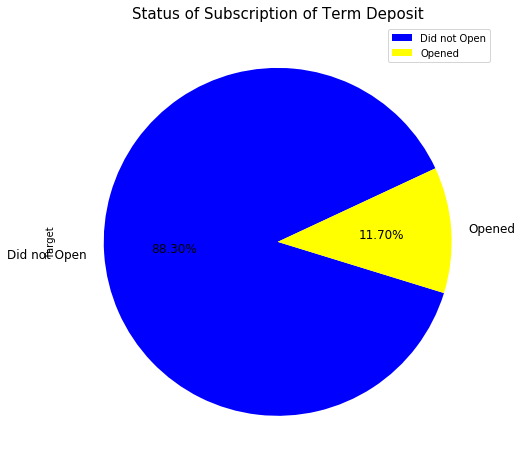

In [12]:
plt.figure(figsize = (12, 8))

colors = ['blue', 'yellow']
labels = 'Did not Open', 'Opened'

df['Target'].value_counts().plot(kind = 'pie', autopct = '%1.2f%%', shadow = False, legend = True, colors = colors, 
                                labels = labels, fontsize = 12, startangle = 25)
plt.title('Status of Subscription of Term Deposit', fontsize = 15)

Text(0.5, 1.0, 'Relation between educational status and balance')

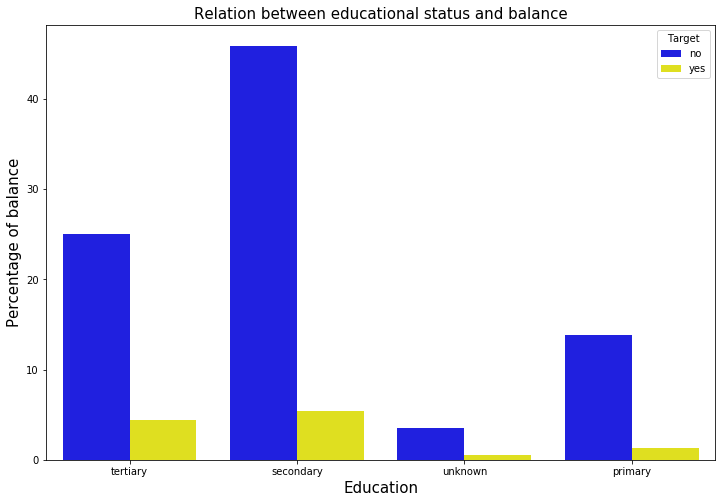

In [13]:
plt.figure(figsize = (12, 8))
sns.barplot(x = df['education'], y = df['balance'], hue = 'Target', data = df, palette = colors, estimator = lambda x: len(x) / len(df) * 100)
plt.xlabel('Education', fontsize = 15)
plt.ylabel('Percentage of balance', fontsize = 15)
plt.title('Relation between educational status and balance', fontsize = 15)

#### e. Checking the presence of outliers

Text(0.5, 1.0, 'Boxplot of Duration Column')

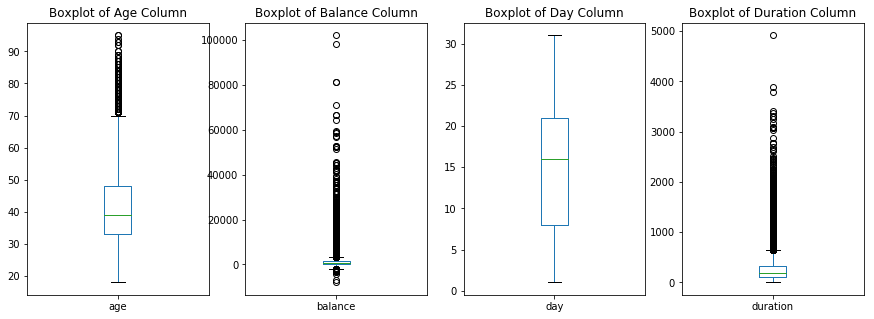

In [14]:
plt.figure(figsize = (15, 5))

plt.subplot(1, 4, 1)
df.age.plot(x = 'age', kind = 'box')
plt.title('Boxplot of Age Column')

plt.subplot(1, 4, 2)
df.balance.plot(x = 'balance', kind = 'box')
plt.title('Boxplot of Balance Column')

plt.subplot(1, 4, 3)
df.day.plot(x = 'day', kind = 'box')
plt.title('Boxplot of Day Column')

plt.subplot(1, 4, 4)
df.duration.plot(x = 'duration', kind = 'box')
plt.title('Boxplot of Duration Column')

Text(0.5, 1.0, 'Boxplot of Previous Column')

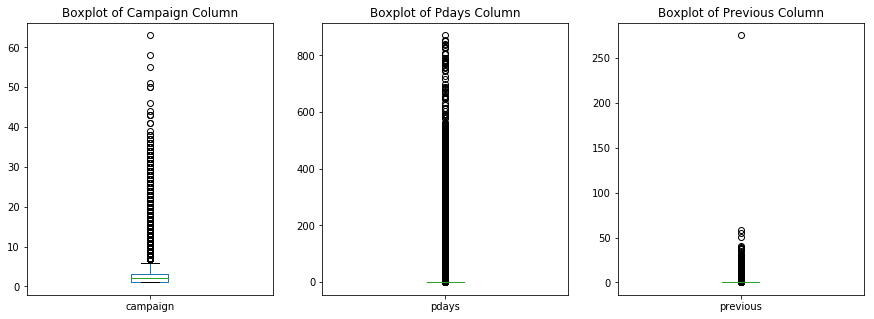

In [15]:
plt.figure(figsize = (15, 5))

plt.subplot(1, 3, 1)
df.campaign.plot(x = 'campaign', kind = 'box')
plt.title('Boxplot of Campaign Column')

plt.subplot(1, 3, 2)
df.pdays.plot(x = 'pdays', kind = 'box')
plt.title('Boxplot of Pdays Column')

plt.subplot(1, 3, 3)
df.previous.plot(x = 'previous', kind = 'box')
plt.title('Boxplot of Previous Column')

##### The above boxplots show that there are outliers present in all of the numerical attributes barring the Day column.
##### Age column has outliers present beyond 70.
##### Balance, Duration, Campaign, Pdays and Previous columns have extreme outliers.

### 4. Prepare the data to train a model – check if data types are appropriate, get rid of the missing values etc

Conversion of 'object' variables into 'Categorical' variables

In [16]:
print('The data type of each attribute after conversion into categorical variables: \n')
for cols in df.columns: # Loop through all columns in the dataframe
    if df[cols].dtype == 'object':
        df[cols] = pd.Categorical(df[cols])
df.dtypes

The data type of each attribute after conversion into categorical variables: 



age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
Target       category
dtype: object

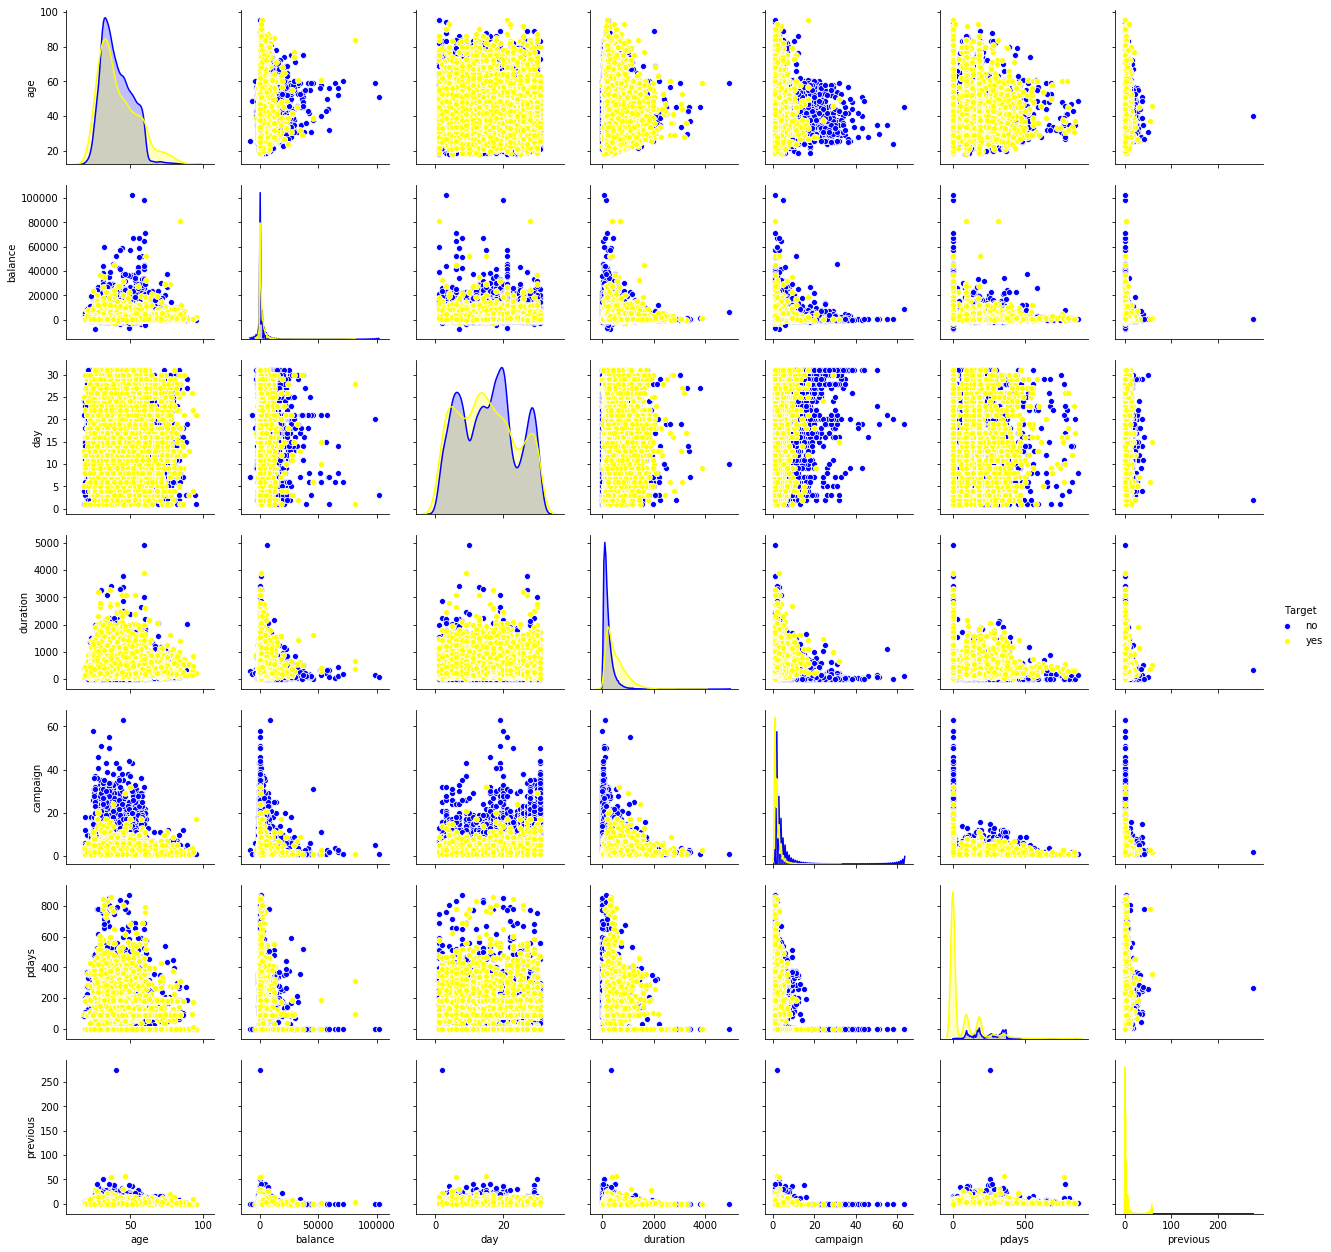

In [17]:
sns.pairplot(df, diag_kind = 'kde', hue = 'Target', palette = colors)

Copying the dataset for encoding.

In [18]:
df_encoded = df.copy(deep = True)

Encoding the values in each categorical column

In [19]:
enc = LabelEncoder()
for cols in df_encoded.columns: # Loop through all columns in the dataframe
    if df_encoded[cols].dtype != 'int':
        df_encoded[cols] = enc.fit_transform(df_encoded[cols]).astype(int)
df_encoded.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,40,4,1,2,0,3036,1,0,2,4,8,261,0,0,0,3,0
1,26,9,2,1,0,945,1,0,2,4,8,151,0,0,0,3,0
2,15,2,1,1,0,918,1,1,2,4,8,76,0,0,0,3,0
3,29,1,1,3,0,2420,1,0,2,4,8,92,0,0,0,3,0
4,15,11,2,3,0,917,0,0,2,4,8,198,0,0,0,3,0


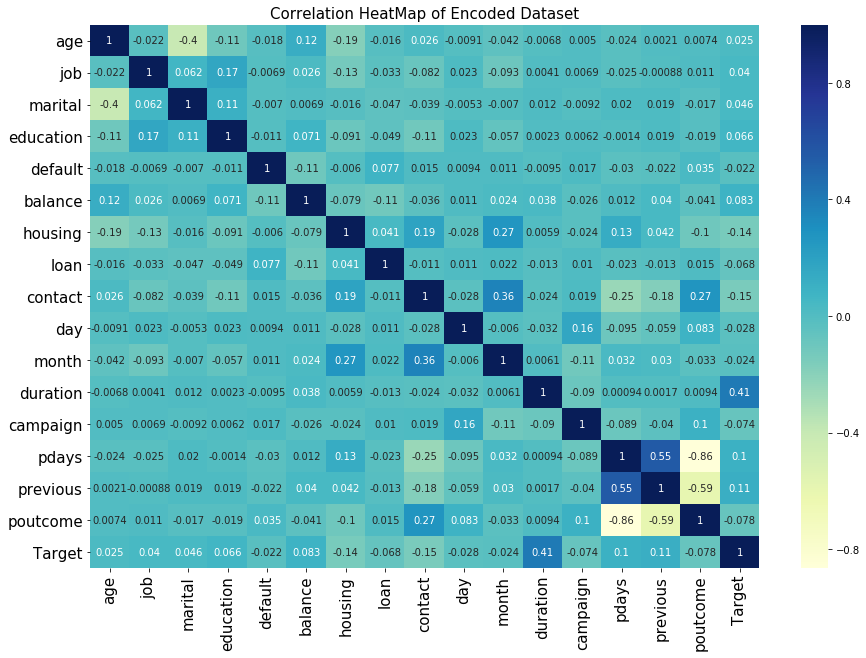

In [20]:
correlation = df_encoded.corr()
plt.figure(figsize = (15, 10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Correlation HeatMap of Encoded Dataset', fontsize = 15)
sns.heatmap(correlation, annot = True, cmap = 'YlGnBu')

Separating target column as 'y'

In [21]:
X = df_encoded.loc[:, df_encoded.columns != 'Target']
y = df_encoded.Target

In [22]:
X_col = X.columns

Text(0.5, 1.0, 'Correlation with Target')

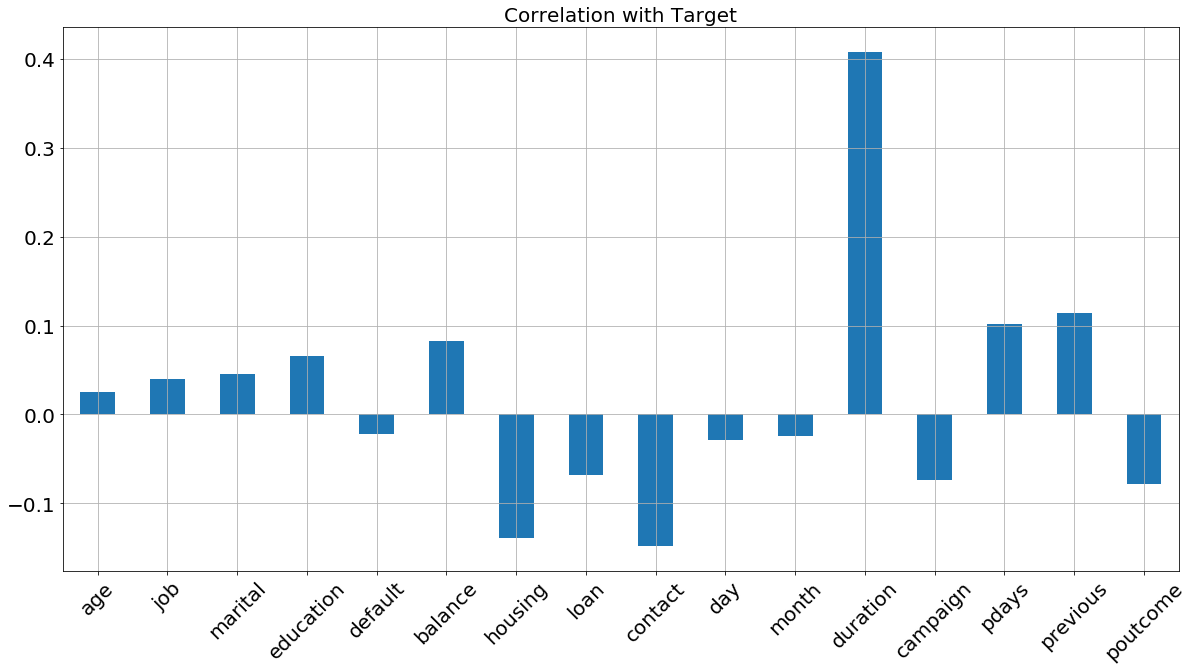

In [23]:
X.corrwith(y).plot.bar(
        figsize = (20, 10), fontsize = 20, 
        rot = 45, grid = True)
plt.title('Correlation with Target', fontsize = 20)

Standardize features by removing the mean and scaling to unit variance

Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).

In [24]:
X_std = pd.DataFrame(StandardScaler().fit_transform(X))
X_std.columns = X_col #the column names are passed to the standardized dataframe
X_std.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1.607094,-0.103820,-0.275762,1.036362,-0.13549,0.732955,0.893915,-0.436803,1.514306,-1.298476,0.823773,0.023623,-0.57297,-0.414317,-0.305354,0.444898
1,0.288564,1.424008,1.368372,-0.300556,-0.13549,-0.695795,0.893915,-0.436803,1.514306,-1.298476,0.823773,-0.435364,-0.57297,-0.414317,-0.305354,0.444898
2,-0.747423,-0.714951,-0.275762,-0.300556,-0.13549,-0.714243,0.893915,2.289359,1.514306,-1.298476,0.823773,-0.748309,-0.57297,-0.414317,-0.305354,0.444898
3,0.571107,-1.020516,-0.275762,2.373280,-0.13549,0.312051,0.893915,-0.436803,1.514306,-1.298476,0.823773,-0.681548,-0.57297,-0.414317,-0.305354,0.444898
4,-0.747423,2.035139,1.368372,2.373280,-0.13549,-0.714927,-1.118674,-0.436803,1.514306,-1.298476,0.823773,-0.239251,-0.57297,-0.414317,-0.305354,0.444898


Splitting the data into training (70%) and testing set (30%). 

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.3, random_state = 10)

rtr, ctr = X_train.shape
print('The training set comprises of -', rtr, 'rows and', ctr, '- columns.')

The training set comprises of - 31647 rows and 16 - columns.


In [26]:
rt, ct = X_test.shape
print('The test set comprises of -', rt, 'rows and', ct, '- columns.')

The test set comprises of - 13564 rows and 16 - columns.


### 5. Train a few standard classification algorithms, note and comment on their performances along different metrics.

### Gaussian Naive Bayes Model

GaussianNB(priors=None, var_smoothing=1e-09)

Accuracy Score of Training Data:  0.8364773912219168

Accuracy Score of Test Data:  0.8374373341197286

Classification Report of Naive Bayes Model:
                precision    recall  f1-score   support

           0       0.94      0.88      0.91     12006
           1       0.36      0.53      0.43      1558

   micro avg       0.84      0.84      0.84     13564
   macro avg       0.65      0.70      0.67     13564
weighted avg       0.87      0.84      0.85     13564


Mean Absolute Error of Naive Bayes:
 0.1625626658802713

Confusion Matrix of Naive Bayes Model:
  [[10533  1473]
 [  732   826]]


Text(0.5, 1.0, 'Confusion Matrix HeatMap of Gaussian Naive Bayes Model')

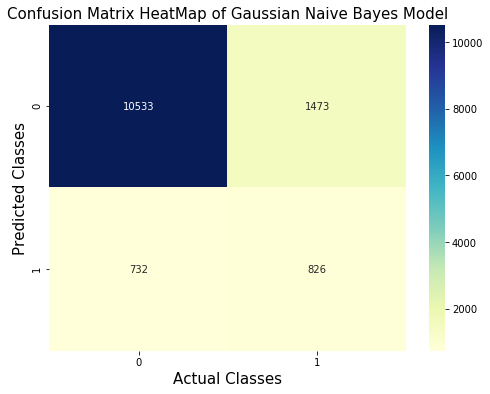

In [27]:
model_NB = GaussianNB()

#fitting the model
model_NB.fit(X_train, y_train)
print(model_NB)

# make predictions
y_predictNB = model_NB.predict(X_test)

#evaluate the accuracy
modeltrNB_score = model_NB.score(X_train, y_train)
print('\nAccuracy Score of Training Data: ', modeltrNB_score)
modelNB_score = accuracy_score(y_test, y_predictNB)
print('\nAccuracy Score of Test Data: ', modelNB_score)

cfm_NB = confusion_matrix(y_test, y_predictNB)

# summarize the fit of the model
print('\nClassification Report of Naive Bayes Model:\n ', classification_report(y_test, y_predictNB))
print('\nMean Absolute Error of Naive Bayes:\n', mean_absolute_error(y_test, y_predictNB))
print('\nConfusion Matrix of Naive Bayes Model:\n ', cfm_NB)

#visualization of confusion matrix in the form of a heatmap
plt.figure(figsize = (8, 6))
sns.heatmap(cfm_NB, annot = True, cmap = 'YlGnBu', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix HeatMap of Gaussian Naive Bayes Model', fontsize = 15)

In [28]:
precision_NB, recall_NB, f1_score_NB, support = precision_recall_fscore_support(y_test, y_predictNB, average = 'macro')
print('Precision Score :', '%0.2f' % precision_NB)
print('Recall Score :', '%0.2f' % recall_NB)
print('F1-Score:', '%0.2f' % f1_score_NB)
print('Accuracy Score :','%0.2f' % modelNB_score)

Precision Score : 0.65
Recall Score : 0.70
F1-Score: 0.67
Accuracy Score : 0.84


### Logistic Regression Model

        age       job   marital  education   default  balance   housing  \
0  0.055704  0.019323  0.127135   0.137608 -0.029892  0.14325 -0.516224   

       loan   contact       day     month  duration  campaign     pdays  \
0 -0.248539 -0.578934 -0.063072  0.106732  1.003016 -0.394144  0.322745   

   previous  poutcome  intercept  
0  0.209131  0.218846  -2.715521  


Accuracy Score of Training Data:  0.8903529560463868

Accuracy Score of Test Data:  0.8928782070185786

Classification Report of Logistic Regression Model:
                precision    recall  f1-score   support

           0       0.91      0.98      0.94     12006
           1       0.58      0.24      0.34      1558

   micro avg       0.89      0.89      0.89     13564
   macro avg       0.75      0.61      0.64     13564
weighted avg       0.87      0.89      0.87     13564


Mean Absolute Error of Logistic Regression:
 0.10712179298142141

Confusion Matrix of Logistic Regression: 
 [[11740   266]
 [ 1187   371]]


Text(0.5, 1.0, 'Confusion Matrix HeatMap of Logistic Regression Model')

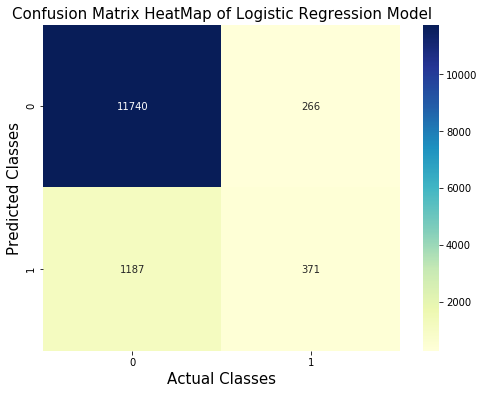

In [29]:
modelLR = LogisticRegression(C = 0.1, solver = 'liblinear')

#fitting the model
modelLR.fit(X_train, y_train)

#predicting
y_predictLR = modelLR.predict(X_test)

coef_df = pd.DataFrame(modelLR.coef_, columns = X_col)
coef_df['intercept'] = modelLR.intercept_
print(coef_df)

cfm_LR = confusion_matrix(y_test, y_predictLR)
# evaluate accuracy
modeltrLR_score = modelLR.score(X_train, y_train)
print('\n\nAccuracy Score of Training Data: ', modeltrLR_score)
modelLR_score = accuracy_score(y_test, y_predictLR)
print('\nAccuracy Score of Test Data: ', modelLR_score)
print('\nClassification Report of Logistic Regression Model:\n ', classification_report(y_test, y_predictLR))
print('\nMean Absolute Error of Logistic Regression:\n', mean_absolute_error(y_test, y_predictLR))
print('\nConfusion Matrix of Logistic Regression: \n', cfm_LR)

#visualization of confusion matrix in the form of a heatmap
plt.figure(figsize = (8, 6))
sns.heatmap(cfm_LR, annot = True, cmap = 'YlGnBu', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix HeatMap of Logistic Regression Model', fontsize = 15)

In [30]:
precision_LR, recall_LR, f1_score_LR, support = precision_recall_fscore_support(y_test, y_predictLR, average = 'macro')
print('Precision Score :', '%0.2f' % precision_LR) 
print('Recall Score :', '%0.2f' % recall_LR)
print('F1-Score:', '%0.2f' % f1_score_LR)
print('Accuracy Score :','%0.2f' % modelLR_score)

Precision Score : 0.75
Recall Score : 0.61
F1-Score: 0.64
Accuracy Score : 0.89


### Support Vector Classifier

Accuracy Score of Training Data:  0.90687900906879

Accuracy Score of Test Data: 0.9013565319964613

Classification Report of SVC Model:
                precision    recall  f1-score   support

           0       0.91      0.98      0.95     12006
           1       0.66      0.30      0.41      1558

   micro avg       0.90      0.90      0.90     13564
   macro avg       0.79      0.64      0.68     13564
weighted avg       0.89      0.90      0.88     13564


Mean Absolute Error of SVC:
 0.09864346800353878

Confusion Matrix of SVC:
 [[11766   240]
 [ 1098   460]]


Text(0.5, 1.0, 'Confusion Matrix HeatMap of SVC Model')

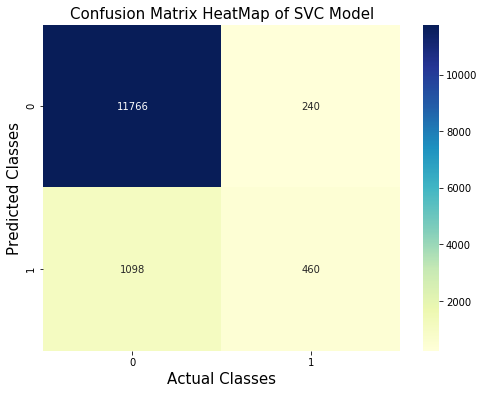

In [31]:
svc_model = SVC(kernel = 'rbf', gamma = 'scale')

# fitting the model
svc_model.fit(X_train, y_train)

# predict the response
y_predictSVC = svc_model.predict(X_test)

modeltrSVC_score = svc_model.score(X_train, y_train)
print('Accuracy Score of Training Data: ', modeltrSVC_score)

cfm_SVC = confusion_matrix(y_test, y_predictSVC)


# evaluate accuracy
modelSVC_score_rbf = accuracy_score(y_test, y_predictSVC)
print('\nAccuracy Score of Test Data:', modelSVC_score_rbf)
print('\nClassification Report of SVC Model:\n ', classification_report(y_test, y_predictSVC))
print('\nMean Absolute Error of SVC:\n', mean_absolute_error(y_test, y_predictSVC))
print('\nConfusion Matrix of SVC:\n', cfm_SVC)

#visualization of confusion matrix in the form of a heatmap
plt.figure(figsize = (8, 6))
sns.heatmap(cfm_SVC, annot = True, cmap = 'YlGnBu', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix HeatMap of SVC Model', fontsize = 15)

In [32]:
precision_SVC, recall_SVC, f1_score_SVC, support = precision_recall_fscore_support(y_test, y_predictSVC, average = 'macro')
print('Precision Score :', '%0.2f' % precision_SVC)
print('Recall Score :', '%0.2f' % recall_SVC)
print('F1-Score :', '%0.2f' % f1_score_SVC)
print('Accuracy Score :','%0.2f' % modelSVC_score_rbf)

Precision Score : 0.79
Recall Score : 0.64
F1-Score : 0.68
Accuracy Score : 0.90


### KNN Classifier

In [33]:
# creating odd list of K for KNN
myList = list(range(1, 30))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [34]:
# empty list that will hold accuracy scores
accuracy_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    # predict the response
    y_predictKNN = knn.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_predictKNN)
    accuracy_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in accuracy_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('The optimal number of neighbors is: ', optimal_k)

The optimal number of neighbors is:  29


Accuracy Score of Training Data:  0.8984105918412488

Accuracy Score of Test Data:  0.8975965791801829

Classification Report of KNN Model:
                precision    recall  f1-score   support

           0       0.91      0.98      0.94     12006
           1       0.66      0.23      0.34      1558

   micro avg       0.90      0.90      0.90     13564
   macro avg       0.78      0.61      0.64     13564
weighted avg       0.88      0.90      0.87     13564


Mean Absolute Error of KNN:
 0.10240342081981717

Confusion Matrix of KNN:
 [[11823   183]
 [ 1206   352]]


Text(0.5, 1.0, 'Confusion Matrix HeatMap of KNN Model')

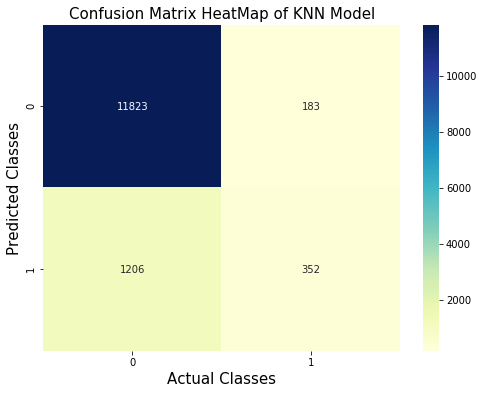

In [35]:
#Using optimal_k from above as the final model for prediction
knn = KNeighborsClassifier(n_neighbors = optimal_k)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_predictKNN = knn.predict(X_test)

# evaluate accuracy
modeltrKNN_score = knn.score(X_train, y_train)
print('Accuracy Score of Training Data: ', modeltrKNN_score)
modelKNN_score = accuracy_score(y_test, y_predictKNN)

cfm_KNN = confusion_matrix(y_test, y_predictKNN)
print('\nAccuracy Score of Test Data: ', modelKNN_score)
print('\nClassification Report of KNN Model:\n ', classification_report(y_test, y_predictKNN))
print('\nMean Absolute Error of KNN:\n', mean_absolute_error(y_test, y_predictKNN))
print('\nConfusion Matrix of KNN:\n', cfm_KNN)

#visualization of confusion matrix in the form of a heatmap
plt.figure(figsize = (8, 6))
sns.heatmap(cfm_KNN, annot = True, cmap = 'YlGnBu', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix HeatMap of KNN Model', fontsize = 15)

In [36]:
precision_KNN, recall_KNN, f1_score_KNN, support = precision_recall_fscore_support(y_test, y_predictKNN, average = 'macro')
print('Precision Score :', '%0.2f' % precision_KNN)
print('Recall Score :', '%0.2f' % recall_KNN)
print('F1-Score :', '%0.2f' % f1_score_KNN)
print('Accuracy Score :','%0.2f' % modelKNN_score)

Precision Score : 0.78
Recall Score : 0.61
F1-Score : 0.64
Accuracy Score : 0.90


### Result of Standard Classification Models (in increasing order of Accuracy Score)

In [37]:
modellists = []
modellists.append(['Gaussian Naive Bayes', modeltrNB_score * 100, modelNB_score * 100, recall_NB * 100, precision_NB * 100])
modellists.append(['Logistic Regression', modeltrLR_score * 100, modelLR_score * 100, recall_LR * 100, precision_LR * 100])
modellists.append(['K-Nearest Neighbour', modeltrKNN_score * 100, modelKNN_score * 100, recall_KNN * 100, precision_KNN * 100])
modellists.append(['Support Vector Classifier', modeltrSVC_score * 100, modelSVC_score_rbf * 100, recall_SVC * 100, precision_SVC * 100])
model_df = pd.DataFrame(modellists, columns = ['Model', 'Accuracy Score of Training Data', 'Accuracy Score of Test Data', 'Recall Score', 'Precision Score'])
model_df

,Model,Accuracy Score of Training Data,Accuracy Score of Test Data,Recall Score,Precision Score
0,Gaussian Naive Bayes,83.647739,83.743733,70.373911,64.715331
1,Logistic Regression,89.035296,89.287821,60.798511,74.529713
2,K-Nearest Neighbour,89.841059,89.759658,60.534415,78.269059
3,Support Vector Classifier,90.687901,90.135653,63.763016,78.589419


As can be seen in the above dataframe, the Support Vector Classifier model performs the best followed by KNN Model

### 6. Build the ensemble models and compare the results with the base models.

### Decison Tree Classifier

Accuracy Score of Training Data:  0.8942395803709672

Accuracy Score of Test Data: 0.8950899439693306

Classification Report of Decision Tree Model:
                precision    recall  f1-score   support

           0       0.91      0.98      0.94     12006
           1       0.60      0.26      0.36      1558

   micro avg       0.90      0.90      0.90     13564
   macro avg       0.76      0.62      0.65     13564
weighted avg       0.87      0.90      0.88     13564


Mean Absolute Error of Decision Tree Model:
 0.10491005603066941

Confusion Matrix of Decision Tree Model:
 [[11741   265]
 [ 1158   400]]


Text(0.5, 1.0, 'Confusion Matrix HeatMap of Decision Tree Model')

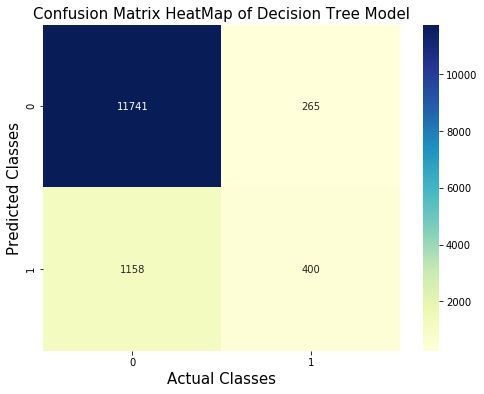

In [38]:
DT = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, min_samples_leaf = 5)
DT.fit(X_train, y_train)
y_predictDT = DT.predict(X_test)

modeltrDT_score = DT.score(X_train, y_train)
print('Accuracy Score of Training Data: ', modeltrDT_score)


cfm_DT = confusion_matrix(y_test, y_predictDT)


# evaluate accuracy
modelDT_score = accuracy_score(y_test, y_predictDT)
print('\nAccuracy Score of Test Data:', modelDT_score)
print('\nClassification Report of Decision Tree Model:\n ', classification_report(y_test, y_predictDT))
print('\nMean Absolute Error of Decision Tree Model:\n', mean_absolute_error(y_test, y_predictDT))
print('\nConfusion Matrix of Decision Tree Model:\n', cfm_DT)

#visualization of confusion matrix in the form of a heatmap
plt.figure(figsize = (8, 6))
sns.heatmap(cfm_DT, annot = True, cmap = 'YlGnBu', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix HeatMap of Decision Tree Model', fontsize = 15)

In [39]:
precision_DT, recall_DT, f1_score_DT, support = precision_recall_fscore_support(y_test, y_predictDT, average = 'macro')
print('Precision Score :', '%0.2f' % precision_DT)
print('Recall Score :', '%0.2f' % recall_DT)
print('F1-Score :', '%0.2f' % f1_score_DT)
print('Accuracy Score :','%0.2f' % modelDT_score)

Precision Score : 0.76
Recall Score : 0.62
F1-Score : 0.65
Accuracy Score : 0.90


           Feature Importance
job                  0.000000
marital              0.000000
education            0.000000
default              0.000000
loan                 0.000000
previous             0.000000
balance              0.002293
campaign             0.002920
day                  0.003431
age                  0.003756
poutcome             0.011730
month                0.060016
pdays                0.076897
housing              0.078749
contact              0.156380
duration             0.603828


Text(0.5, 1.0, 'Determining Feature Improtance with Decision Tree Classifier')

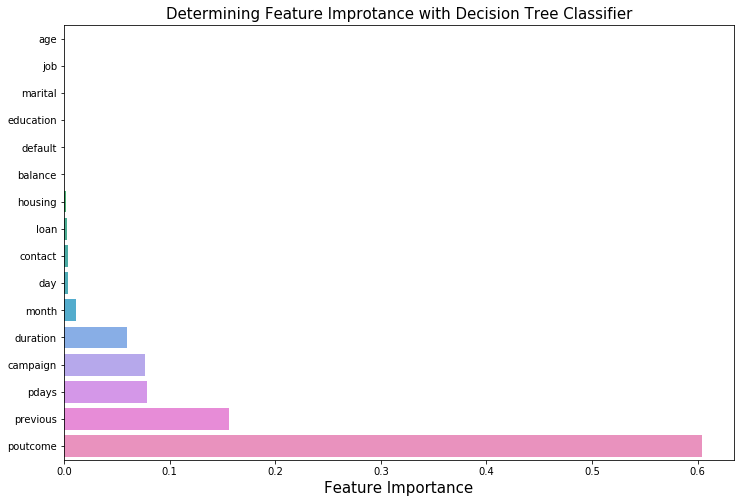

In [40]:
FI_DT = pd.DataFrame(DT.feature_importances_, columns = ['Feature Importance'], index = X_train.columns)
FI_d = FI_DT.sort_values(by = 'Feature Importance', ascending = True)
print(FI_d)

plt.figure(figsize = (12, 8))
sns.barplot(x = FI_d['Feature Importance'], y = X_train.columns)
plt.xlabel('Feature Importance', fontsize = 15)
plt.title('Determining Feature Improtance with Decision Tree Classifier', fontsize = 15)

### AdaBoost Classifier
##### using Decision Tree Model as base estimator

Accuracy Score of Training Data:  0.9417638322747812

Accuracy Score of Test Data: 0.9016514302565615

Classification Report of AdaBoost Classification Model:
                precision    recall  f1-score   support

           0       0.94      0.95      0.95     12006
           1       0.59      0.49      0.53      1558

   micro avg       0.90      0.90      0.90     13564
   macro avg       0.76      0.72      0.74     13564
weighted avg       0.90      0.90      0.90     13564


Mean Absolute Error of AdaBoost Classification Model:
 0.09834856974343852

Confusion Matrix of AdaBoost Classification Model:
 [[11464   542]
 [  792   766]]


Text(0.5, 1.0, 'Confusion Matrix HeatMap of AdaBoost Classification Model')

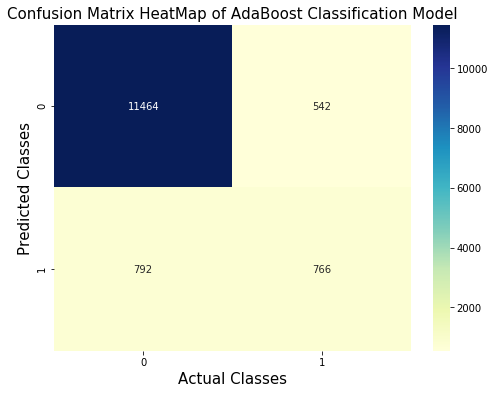

In [41]:
AB = AdaBoostClassifier(base_estimator = DT, n_estimators = 50) #using Decision Tree Model as base estimator
 
AB = AB.fit(X_train, y_train)
y_predictAB = AB.predict(X_test)

modeltrAB_score = AB.score(X_train, y_train)
print('Accuracy Score of Training Data: ', modeltrAB_score)


cfm_AB = confusion_matrix(y_test, y_predictAB)


# evaluate accuracy
modelAB_score = accuracy_score(y_test, y_predictAB)
print('\nAccuracy Score of Test Data:', modelAB_score)
print('\nClassification Report of AdaBoost Classification Model:\n ', classification_report(y_test, y_predictAB))
print('\nMean Absolute Error of AdaBoost Classification Model:\n', mean_absolute_error(y_test, y_predictAB))
print('\nConfusion Matrix of AdaBoost Classification Model:\n', cfm_AB)

#visualization of confusion matrix in the form of a heatmap
plt.figure(figsize = (8, 6))
sns.heatmap(cfm_AB, annot = True, cmap = 'YlGnBu', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix HeatMap of AdaBoost Classification Model', fontsize = 15)

In [42]:
precision_AB, recall_AB, f1_score_AB, support = precision_recall_fscore_support(y_test, y_predictAB, average = 'macro')
print('Precision Score :', '%0.2f' % precision_AB)
print('Recall Score :', '%0.2f' % recall_AB)
print('F1-Score :', '%0.2f' % f1_score_AB)
print('Accuracy Score :','%0.2f' % modelAB_score)

Precision Score : 0.76
Recall Score : 0.72
F1-Score : 0.74
Accuracy Score : 0.90


### Bagging Classifier 
##### using Decision Tree Model as base estimator

Accuracy Score of Training Data:  0.9029923847442095

Accuracy Score of Test Data: 0.9029047478619876

Classification Report of Bagging Classification Model:
                precision    recall  f1-score   support

           0       0.92      0.98      0.95     12006
           1       0.66      0.32      0.43      1558

   micro avg       0.90      0.90      0.90     13564
   macro avg       0.79      0.65      0.69     13564
weighted avg       0.89      0.90      0.89     13564


Mean Absolute Error of Bagging Classification Model:
 0.09709525213801239

Confusion Matrix of Bagging Classification Model:
 [[11743   263]
 [ 1054   504]]


Text(0.5, 1.0, 'Confusion Matrix HeatMap of Bagging Classification Model')

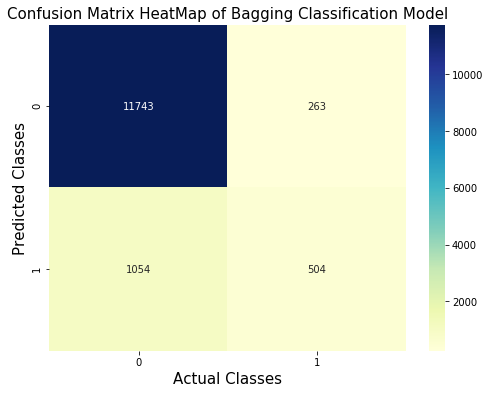

In [43]:
BG = BaggingClassifier(base_estimator = DT, n_estimators = 50) #using Decision Tree Model as base estimator


BG = BG.fit(X_train, y_train)
y_predictBG = BG.predict(X_test)

modeltrBG_score = BG.score(X_train, y_train)
print('Accuracy Score of Training Data: ', modeltrBG_score)


cfm_BG = confusion_matrix(y_test, y_predictBG)


# evaluate accuracy
modelBG_score = accuracy_score(y_test, y_predictBG)
print('\nAccuracy Score of Test Data:', modelBG_score)
print('\nClassification Report of Bagging Classification Model:\n ', classification_report(y_test, y_predictBG))
print('\nMean Absolute Error of Bagging Classification Model:\n', mean_absolute_error(y_test, y_predictBG))
print('\nConfusion Matrix of Bagging Classification Model:\n', cfm_BG)

#visualization of confusion matrix in the form of a heatmap
plt.figure(figsize = (8, 6))
sns.heatmap(cfm_BG, annot = True, cmap = 'YlGnBu', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix HeatMap of Bagging Classification Model', fontsize = 15)

In [44]:
precision_BG, recall_BG, f1_score_BG, support = precision_recall_fscore_support(y_test, y_predictBG, average = 'macro')
print('Precision Score :', '%0.2f' % precision_BG)
print('Recall Score :', '%0.2f' % recall_BG)
print('F1-Score :', '%0.2f' % f1_score_BG)
print('Accuracy Score :','%0.2f' % modelBG_score)

Precision Score : 0.79
Recall Score : 0.65
F1-Score : 0.69
Accuracy Score : 0.90


### Random Forest Classifier

Accuracy Score of Training Data:  0.8943027775144563

Accuracy Score of Test Data: 0.8972279563550575

Classification Report of Random Forest Model:
                precision    recall  f1-score   support

           0       0.90      1.00      0.94     12006
           1       0.81      0.14      0.23      1558

   micro avg       0.90      0.90      0.90     13564
   macro avg       0.85      0.57      0.59     13564
weighted avg       0.89      0.90      0.86     13564


Mean Absolute Error of Random Forest Model:
 0.1027720436449425

Confusion Matrix of Random Forest Model:
 [[11956    50]
 [ 1344   214]]


Text(0.5, 1.0, 'Confusion Matrix HeatMap of Random Forest Model')

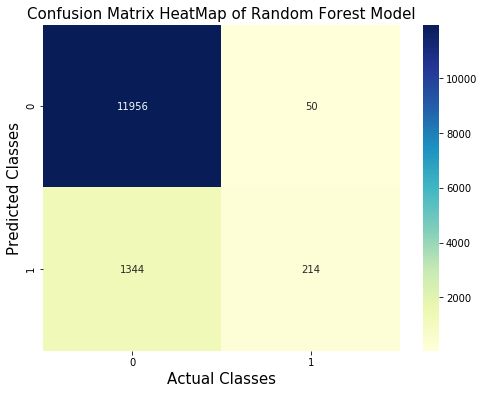

In [45]:
RF = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', max_depth = 5, min_samples_leaf = 5, random_state = 10)
RF = RF.fit(X_train, y_train)
y_predictRF = RF.predict(X_test)

modeltrRF_score = RF.score(X_train, y_train)
print('Accuracy Score of Training Data: ', modeltrRF_score)


cfm_RF = confusion_matrix(y_test, y_predictRF)


# evaluate accuracy
modelRF_score = accuracy_score(y_test, y_predictRF)
print('\nAccuracy Score of Test Data:', modelRF_score)
print('\nClassification Report of Random Forest Model:\n ', classification_report(y_test, y_predictRF))
print('\nMean Absolute Error of Random Forest Model:\n', mean_absolute_error(y_test, y_predictRF))
print('\nConfusion Matrix of Random Forest Model:\n', cfm_RF)

#visualization of confusion matrix in the form of a heatmap
plt.figure(figsize = (8, 6))
sns.heatmap(cfm_RF, annot = True, cmap = 'YlGnBu', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix HeatMap of Random Forest Model', fontsize = 15)

In [46]:
precision_RF, recall_RF, f1_score_RF, support = precision_recall_fscore_support(y_test, y_predictRF, average = 'macro')
print('Precision Score :', '%0.2f' % precision_RF)
print('Recall Score :', '%0.2f' % recall_RF)
print('F1-Score :', '%0.2f' % f1_score_RF)
print('Accuracy Score :','%0.2f' % modelRF_score)

Precision Score : 0.85
Recall Score : 0.57
F1-Score : 0.59
Accuracy Score : 0.90


           Feature Importance
default              0.000151
job                  0.002543
education            0.002836
marital              0.003486
loan                 0.005527
day                  0.006451
campaign             0.007144
balance              0.012088
previous             0.032481
age                  0.039433
month                0.049193
pdays                0.062388
housing              0.064496
contact              0.083279
poutcome             0.124109
duration             0.504395


Text(0.5, 1.0, 'Determining Feature Improtance with Random Forest Classifier')

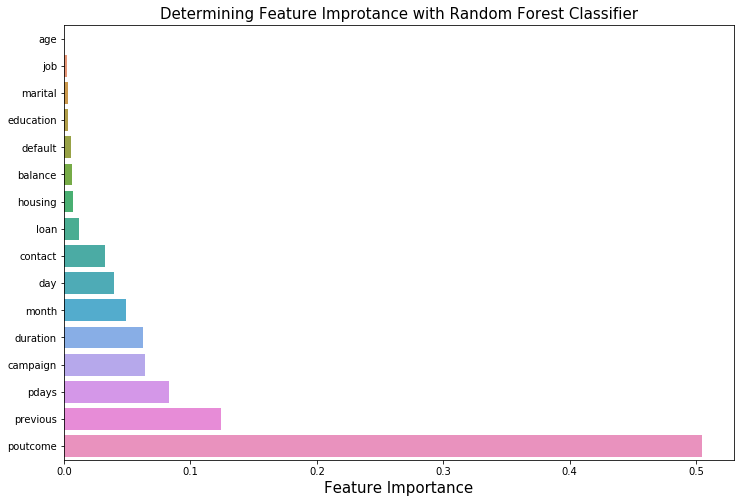

In [47]:
FI_RF = pd.DataFrame(RF.feature_importances_, columns = ['Feature Importance'], index = X_train.columns)
FI_r = FI_RF.sort_values(by = 'Feature Importance', ascending = True)
print(FI_r)

plt.figure(figsize = (12, 8))
sns.barplot(x = FI_r['Feature Importance'], y = X_train.columns)
plt.xlabel('Feature Importance', fontsize = 15)
plt.title('Determining Feature Improtance with Random Forest Classifier', fontsize = 15)

### Gradient Boosting Classifier

Accuracy Score of Training Data:  0.9398363193983632

Accuracy Score of Test Data: 0.9102034797994691

Classification Report of Gradient Boosting Classification Model:
                precision    recall  f1-score   support

           0       0.93      0.97      0.95     12006
           1       0.65      0.48      0.55      1558

   micro avg       0.91      0.91      0.91     13564
   macro avg       0.79      0.72      0.75     13564
weighted avg       0.90      0.91      0.90     13564


Mean Absolute Error of Gradient Boosting Classification Model:
 0.08979652020053082

Confusion Matrix of Gradient Boosting Classification Model:
 [[11600   406]
 [  812   746]]


Text(0.5, 1.0, 'Confusion Matrix HeatMap of Gradient Boosting Classification Model')

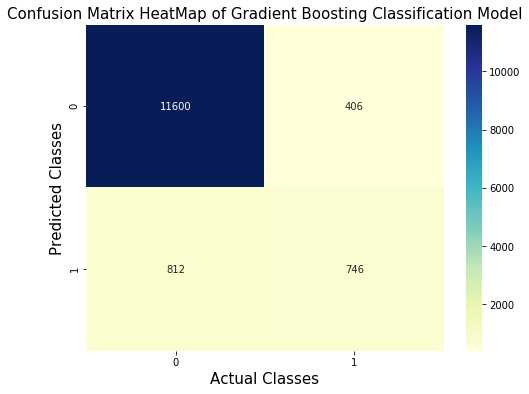

In [48]:
GB = GradientBoostingClassifier(n_estimators = 200, max_depth = 5, min_samples_leaf = 5, random_state = 10)
GB = GB.fit(X_train, y_train)
y_predictGB = GB.predict(X_test)

modeltrGB_score = GB.score(X_train, y_train)
print('Accuracy Score of Training Data: ', modeltrGB_score)


cfm_GB = confusion_matrix(y_test, y_predictGB)


# evaluate accuracy
modelGB_score = accuracy_score(y_test, y_predictGB)
print('\nAccuracy Score of Test Data:', modelGB_score)
print('\nClassification Report of Gradient Boosting Classification Model:\n ', classification_report(y_test, y_predictGB))
print('\nMean Absolute Error of Gradient Boosting Classification Model:\n', mean_absolute_error(y_test, y_predictGB))
print('\nConfusion Matrix of Gradient Boosting Classification Model:\n', cfm_GB)

#visualization of confusion matrix in the form of a heatmap
plt.figure(figsize = (8, 6))
sns.heatmap(cfm_GB, annot = True, cmap = 'YlGnBu', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix HeatMap of Gradient Boosting Classification Model', fontsize = 15)

In [49]:
precision_GB, recall_GB, f1_score_GB, support = precision_recall_fscore_support(y_test, y_predictGB, average = 'macro')
print('Precision Score :', '%0.2f' % precision_GB)
print('Recall Score :', '%0.2f' % recall_GB)
print('F1-Score :', '%0.2f' % f1_score_GB)
print('Accuracy Score :','%0.2f' % modelGB_score)

Precision Score : 0.79
Recall Score : 0.72
F1-Score : 0.75
Accuracy Score : 0.91


           Feature Importance
default              0.000941
loan                 0.005752
marital              0.007057
education            0.008374
job                  0.009019
campaign             0.009885
previous             0.009892
contact              0.040326
balance              0.041912
housing              0.042015
day                  0.052009
age                  0.069700
poutcome             0.072672
pdays                0.092039
month                0.136731
duration             0.401674


Text(0.5, 1.0, 'Determining Feature Improtance with Gradient Boosting Classifier')

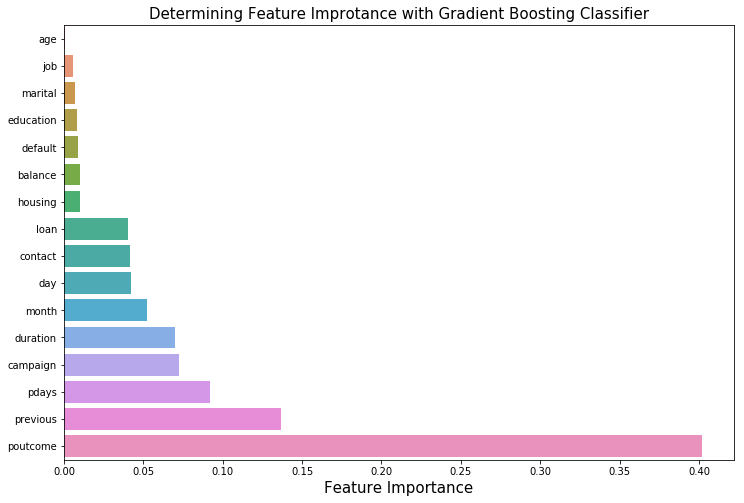

In [50]:
FI_GB = pd.DataFrame(GB.feature_importances_, columns = ['Feature Importance'], index = X_train.columns)
FI_gb = FI_GB.sort_values(by = 'Feature Importance', ascending = True)
print(FI_gb)

plt.figure(figsize = (12, 8))
sns.barplot(x = FI_gb['Feature Importance'], y = X_train.columns)
plt.xlabel('Feature Importance', fontsize = 15)
plt.title('Determining Feature Improtance with Gradient Boosting Classifier', fontsize = 15)

### XGBoost Classifier

Accuracy Score of Training Data:  0.9309255221663981

Accuracy Score of Test Data: 0.9109407254497198

Classification Report of Gradient Boosting Classification Model:
                precision    recall  f1-score   support

           0       0.93      0.97      0.95     12006
           1       0.66      0.47      0.55      1558

   micro avg       0.91      0.91      0.91     13564
   macro avg       0.80      0.72      0.75     13564
weighted avg       0.90      0.91      0.90     13564


Mean Absolute Error of Gradient Boosting Classification Model:
 0.08905927455028015

Confusion Matrix of Gradient Boosting Classification Model:
 [[11621   385]
 [  823   735]]


Text(0.5, 1.0, 'Confusion Matrix HeatMap of XGBoost Classification Model')

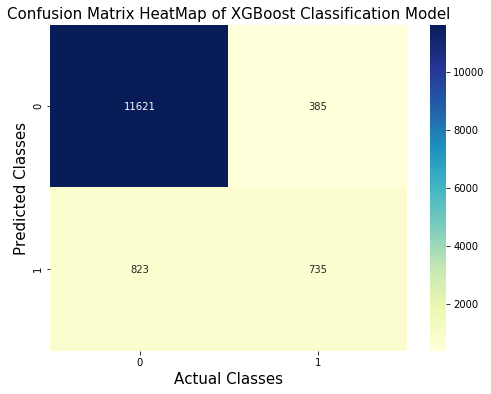

In [51]:
XGB = XGBClassifier(max_depth = 5, n_estimators = 200)
XGB = XGB.fit(X_train, y_train)
y_predictXGB = XGB.predict(X_test)

modeltrXGB_score = XGB.score(X_train, y_train)
print('Accuracy Score of Training Data: ', modeltrXGB_score)


cfm_XGB = confusion_matrix(y_test, y_predictXGB)


# evaluate accuracy
modelXGB_score = accuracy_score(y_test, y_predictXGB)
print('\nAccuracy Score of Test Data:', modelXGB_score)
print('\nClassification Report of Gradient Boosting Classification Model:\n ', classification_report(y_test, y_predictXGB))
print('\nMean Absolute Error of Gradient Boosting Classification Model:\n', mean_absolute_error(y_test, y_predictXGB))
print('\nConfusion Matrix of Gradient Boosting Classification Model:\n', cfm_XGB)

#visualization of confusion matrix in the form of a heatmap
plt.figure(figsize = (8, 6))
sns.heatmap(cfm_XGB, annot = True, cmap = 'YlGnBu', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix HeatMap of XGBoost Classification Model', fontsize = 15)

In [52]:
precision_XGB, recall_XGB, f1_score_XGB, support = precision_recall_fscore_support(y_test, y_predictXGB, average = 'macro')
print('Precision Score :', '%0.2f' % precision_XGB)
print('Recall Score :', '%0.2f' % recall_XGB)
print('F1-Score :', '%0.2f' % f1_score_XGB)
print('Accuracy Score :','%0.2f' % modelXGB_score)

Precision Score : 0.80
Recall Score : 0.72
F1-Score : 0.75
Accuracy Score : 0.91


           Feature Importance
job                  0.015201
default              0.015802
balance              0.018166
marital              0.021834
previous             0.021891
education            0.023841
day                  0.025298
campaign             0.026529
age                  0.029544
pdays                0.049805
month                0.057524
loan                 0.072472
housing              0.112816
contact              0.123389
duration             0.140494
poutcome             0.245393


Text(0.5, 1.0, 'Determining Feature Improtance with XGBoost Classifier')

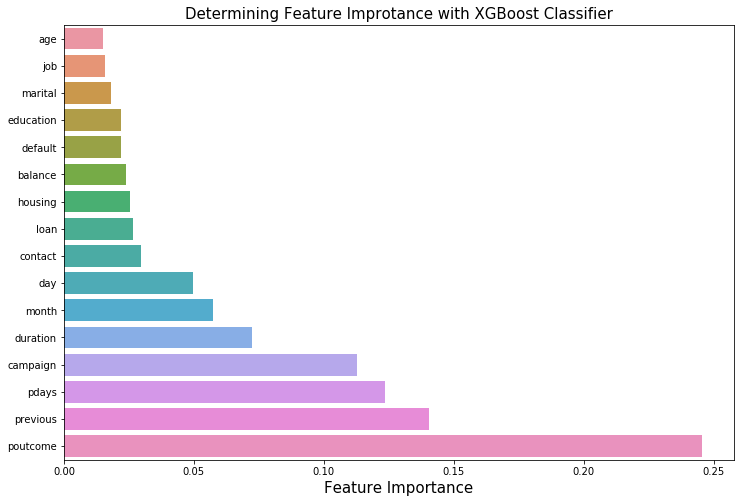

In [53]:
FI_XGB = pd.DataFrame(XGB.feature_importances_, columns = ['Feature Importance'], index = X_train.columns)
FI_xgb = FI_XGB.sort_values(by = 'Feature Importance', ascending = True)
print(FI_xgb)

plt.figure(figsize = (12, 8))
sns.barplot(x = FI_xgb['Feature Importance'], y = X_train.columns)
plt.xlabel('Feature Importance', fontsize = 15)
plt.title('Determining Feature Improtance with XGBoost Classifier', fontsize = 15)

### Result of Ensemble Classification Models (in increasing order of Accuracy Score)

In [54]:
mdllsts = []

mdllsts.append(['Decision Tree', modeltrDT_score * 100, modelDT_score * 100, recall_DT * 100, precision_DT * 100])
mdllsts.append(['Random Forest Classifier',modeltrRF_score * 100, modelRF_score * 100, recall_RF * 100, precision_RF * 100])
mdllsts.append(['Bagging Classifier', modeltrBG_score * 100, modelBG_score * 100, recall_BG * 100, precision_BG * 100])
mdllsts.append(['AdaBoost Classifier', modeltrAB_score * 100, modelAB_score * 100, recall_AB * 100, precision_AB * 100])
mdllsts.append(['Gradient Boosting Classifier', modeltrGB_score * 100, modelGB_score * 100, recall_GB * 100, precision_GB * 100])
mdllsts.append(['XGBoost Classifier', modeltrXGB_score * 100, modelXGB_score * 100, recall_XGB * 100, precision_XGB * 100])

mdl_e_df = pd.DataFrame(mdllsts, columns = ['Model', 'Accuracy Score of Training Data', 'Accuracy Score of Test Data', 'Recall Score', 'Precision Score'])
mdl_e_df

,Model,Accuracy Score of Training Data,Accuracy Score of Test Data,Recall Score,Precision Score
0,Decision Tree,89.423958,89.508994,61.733356,75.586468
1,Random Forest Classifier,89.430278,89.722796,56.659550,85.477671
2,Bagging Classifier,90.299238,90.290475,65.079297,78.737128
3,AdaBoost Classifier,94.176383,90.165143,72.325594,76.050275
4,Gradient Boosting Classifier,93.983632,91.020348,72.250129,79.107444
5,XGBoost Classifier,93.092552,91.094073,71.984568,79.505685


The XGBoost Classifier and Gradient Boosting Classifier gives the best accuracy score followed by AdaBoost Classifier.

### 7. Compare performances of all the models

### Result Summary of all Classification Models (in increasing order of Accuracy Score)

In [55]:
modellsts = []

modellsts.append(['Gaussian Naive Bayes', modeltrNB_score * 100, modelNB_score * 100, recall_NB * 100, precision_NB * 100])
modellsts.append(['Logistic Regression', modeltrLR_score * 100, modelLR_score * 100, recall_LR * 100, precision_LR * 100])
modellsts.append(['Decision Tree', modeltrDT_score * 100, modelDT_score * 100, recall_DT * 100, precision_DT * 100])
modellsts.append(['Random Forest Classifier', modeltrRF_score * 100, modelRF_score * 100, recall_RF * 100, precision_RF * 100])
modellsts.append(['K-Nearest Neighbour', modeltrKNN_score * 100, modelKNN_score * 100, recall_KNN * 100, precision_KNN * 100])
modellsts.append(['Bagging Classifier', modeltrBG_score * 100, modelBG_score * 100, recall_BG * 100, precision_BG * 100])
modellsts.append(['Support Vector Classifier', modeltrSVC_score * 100, modelSVC_score_rbf * 100, recall_SVC * 100, precision_SVC * 100])
modellsts.append(['AdaBoost Classifier', modeltrAB_score * 100, modelAB_score * 100, recall_AB * 100, precision_AB * 100])
modellsts.append(['Gradient Boosting Classifier', modeltrGB_score * 100, modelGB_score * 100, recall_GB * 100, precision_GB * 100])
modellsts.append(['XGBoost Classifier', modeltrXGB_score * 100, modelXGB_score * 100, recall_XGB * 100, precision_XGB * 100])

mdl_df = pd.DataFrame(modellsts, columns = ['Model', 'Accuracy Score of Training Data', 'Accuracy Score of Test Data', 'Recall Score', 'Precision Score'])
mdl_df

,Model,Accuracy Score of Training Data,Accuracy Score of Test Data,Recall Score,Precision Score
0,Gaussian Naive Bayes,83.647739,83.743733,70.373911,64.715331
1,Logistic Regression,89.035296,89.287821,60.798511,74.529713
2,Decision Tree,89.423958,89.508994,61.733356,75.586468
3,Random Forest Classifier,89.430278,89.722796,56.659550,85.477671
4,K-Nearest Neighbour,89.841059,89.759658,60.534415,78.269059
5,Bagging Classifier,90.299238,90.290475,65.079297,78.737128
6,Support Vector Classifier,90.687901,90.135653,63.763016,78.589419
7,AdaBoost Classifier,94.176383,90.165143,72.325594,76.050275
8,Gradient Boosting Classifier,93.983632,91.020348,72.250129,79.107444
9,XGBoost Classifier,93.092552,91.094073,71.984568,79.505685


Graphical Representation of Classification Model vs. Accuracy Score of Test Data

Text(0.5, 1.0, 'Comparison of Classification Models')

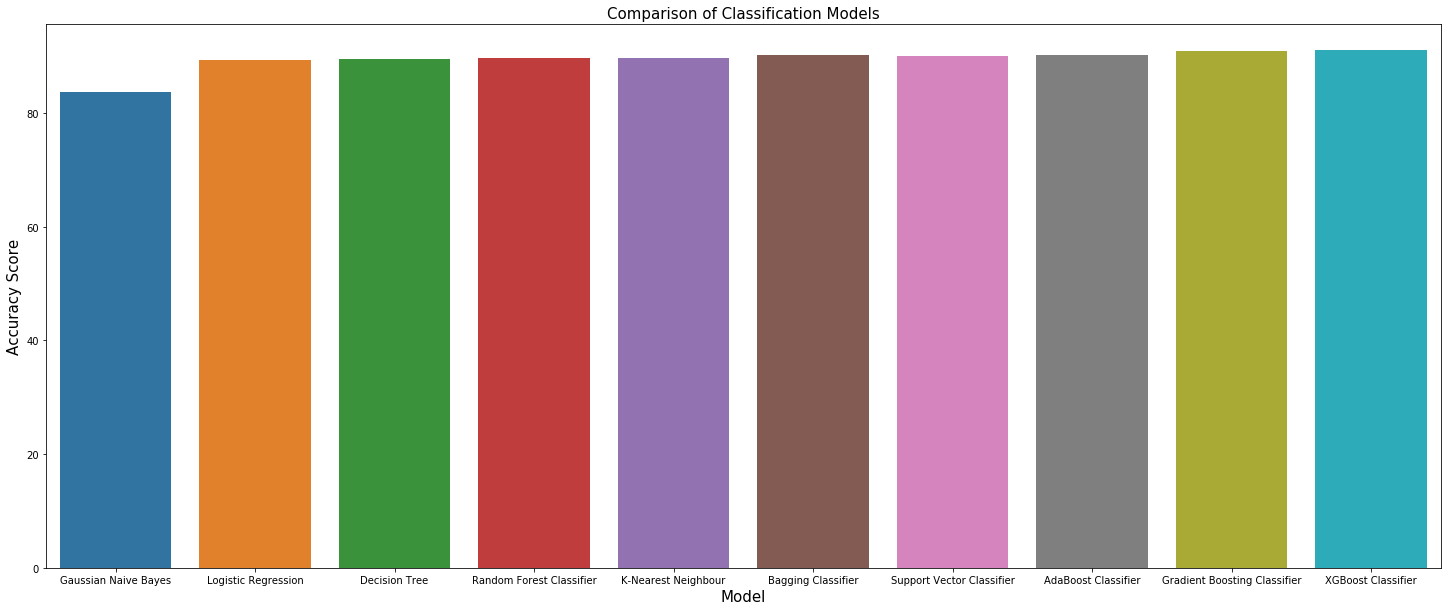

In [56]:
plt.figure(figsize = (25, 10))
sns.barplot(x = mdl_df['Model'], y = mdl_df['Accuracy Score of Test Data'], data = mdl_df)
plt.xlabel('Model', fontsize = 15)
plt.ylabel('Accuracy Score', fontsize = 15)
plt.title('Comparison of Classification Models', fontsize = 15)

For this dataset, XGBoost Classifier and Gradient Boosting Classifier seems to be the best classifier followed by AdaBoost Classifier.